In [1]:
import numpy as np
import matplotlib.pyplot as plt

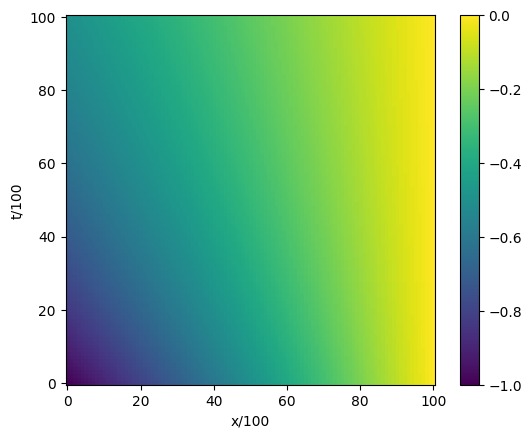

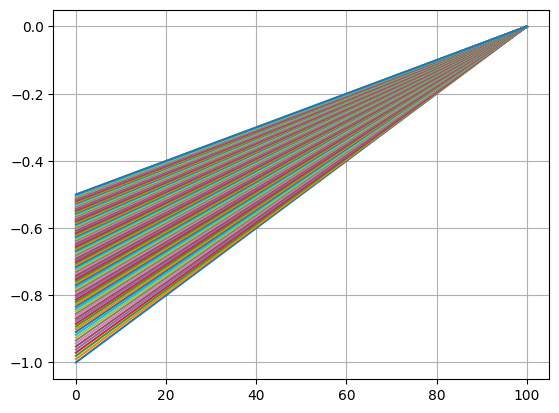

In [2]:
dx = 0.01
dt = 0.01
xx = np.arange(0, 1+dx, dx)
tt = np.arange(0, 1+dt, dt)
a = 1
b = -1
u = np.zeros((xx.shape[0],tt.shape[0]))
for i,x in enumerate(xx):
    for j,t in enumerate(tt):
        u[i,j] = (a*x + b)/(a*t + 1)

plt.figure()
plt.imshow(u.T,cmap='viridis', origin='lower')
plt.colorbar()
plt.xlabel('x/'+str(xx.shape[0]-1))
plt.ylabel('t/'+str(tt.shape[0]-1))

plt.figure()
plt.grid(True)
for j,t in enumerate(tt):
    plt.plot(u[:,j])

In [3]:
# training set
dx = 0.01
dt = 0.1
xx = np.arange(0, 1, dx)
tt = np.arange(0, 1, dt)
Nx = xx.shape[0]
Nt = tt.shape[0]

a_v = np.arange(-0.9, 1, 0.4)
b_v = np.arange(-1, 1, 0.4)

input_list = []
output_list =[]

for a in a_v:
    for b in b_v:
        u_ex = np.zeros((Nx, Nt))
        for i,x in enumerate(xx):
            for j,t in enumerate(tt):
                u_ex[i,j] = (a*x + b)/(a*t + 1)
                if j > 0:
                    input_list.append(u_ex[:,j-1])
                    output_list.append(u_ex[:,j])

input_train = np.array(input_list)
output_train = np.array(output_list)

In [4]:
input_train.shape

(22500, 100)

In [5]:
save_flag = False
# save_flag = True
if save_flag:
    np.save('../data/Burgers/input_train.npy', input_train)
    np.save('../data/Burgers/output_train.npy', output_train)

In [6]:
# test set
dx = 0.01
dt = 0.1
xx = np.arange(0, 1, dx)
tt = np.arange(0, 1, dt)
Nx = xx.shape[0]
Nt = tt.shape[0]

a_v = np.arange(-0.9, 1, 0.8)
b_v = np.arange(-1, 1, 0.8)

input_list = []
output_list =[]

for a in a_v:
    for b in b_v:
        u_ex = np.zeros((Nx, Nt))
        for i,x in enumerate(xx):
            for j,t in enumerate(tt):
                u_ex[i,j] = (a*x + b)/(a*t + 1)
                if j > 0:
                    input_list.append(u_ex[:,j-1])
                    output_list.append(u_ex[:,j])

input_test = np.array(input_list)
output_test = np.array(output_list)

In [7]:
input_test.shape[0]/input_train.shape[0]

0.36

In [8]:
save_flag = False
# save_flag = True
if save_flag:
    np.save('../data/Burgers/input_test.npy', input_test)
    np.save('../data/Burgers/output_test.npy', output_test)